In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas

In [2]:
def synonymity(data):
    """Calculate average synonym count.

    Calculate the average weighted synonym count in the language
    represented by data.

    """
    syn = 0
    m = 0
    for meaning, words in data.groupby("Feature_ID"):
        syn += words["Weight"].sum()**2/(words["Weight"]**2).sum()
        m += 1
    return syn/m

In [3]:
def vocabulary_size(data):
    """Count different words in vocabulary."""
    return len(set(data["Global_CogID"]))

In [4]:
def semantic_width(data):
    """Calculate average synonym count.

    Calculate the average weighted semantic width in the language
    represented by data.

    """
    width = 0
    m = 0
    for form, meanings in data.groupby("Global_CogID"):
        width += meanings["Weight"].sum()**2/(meanings["Weight"]**2).sum()
        m += 1
    return width/m

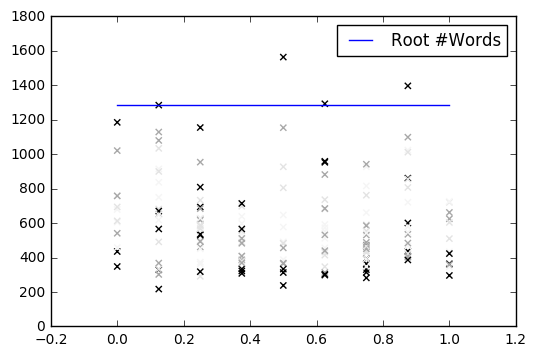

In [5]:
import os
for file in os.listdir("../"):
    parts = file.split("-")
    if len(parts) == 5:
        all_data = pandas.read_csv(
            os.path.join("..", file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        p = float(parts[3])
        x = []
        y = []
        for language_id, language_data in all_data.groupby("Language_ID"):
            if language_id in ["Q","R","S","T"]:
                x.append(p)
                y.append(vocabulary_size(language_data))
        plt.scatter(x, y,
                    color=["0.96", "0.89", "0.66", "0.0"],
                    marker="x")
plt.plot([0,1], [1284, 1284], label="Root #Words")
plt.legend()

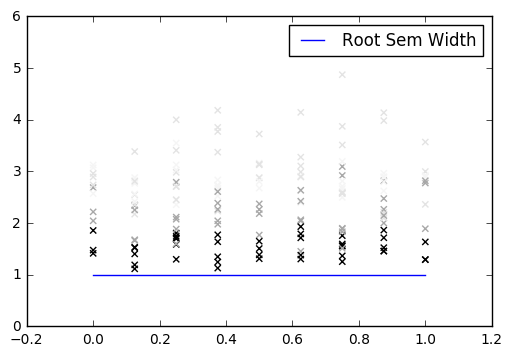

In [ ]:
import os
for file in os.listdir("../"):
    parts = file.split("-")
    if len(parts) == 5:
        all_data = pandas.read_csv(
            os.path.join("..", file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        p = float(parts[3])
        x = []
        y = []
        for language_id, language_data in all_data.groupby("Language_ID"):
            if language_id in ["Q","R","S","T"]:
                x.append(p)
                y.append(semantic_width(language_data))
        plt.scatter(x, y,
                    color=["0.96", "0.89", "0.66", "0.0"],
                    marker="x")
plt.plot([0,1], [1, 1], label="Root Sem Width")
plt.legend()

In [ ]:
import os
for file in os.listdir("../"):
    parts = file.split("-")
    if len(parts) == 5:
        all_data = pandas.read_csv(
            os.path.join("..", file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        p = float(parts[3])
        x = []
        y = []
        for language_id, language_data in all_data.groupby("Language_ID"):
            if language_id in ["Q","R","S","T"]:
                x.append(p)
                y.append(synonymity(language_data))
        plt.scatter(x, y,
                    color=["0.96", "0.89", "0.66", "0.0"],
                    marker="x")
plt.plot([0,1], [1, 1], label="Synonymity at Root")
plt.legend()